<div >
<img src = "figures/banner.png" />
</div>

# Lecture 7: Machine Learning: Recap

 - El objetivo es predecir $y$ dadas otras variables $X$. Ej: precio vivienda dadas las características
  
- Asumimos que el link entre $y$ and $X$ esta dado por:

\begin{align}
  y = f(X) + u
\end{align}


  - donde $f(X)$ es cualquier función, 
  
  -  $u$ una variable aleatoria no observable $E(u)=0$ and $V(u) = \sigma^2$


<div >
<img src = "figures_noteboook/fig_1a-1.png" />
</div>

<div >
<img src = "figures_noteboook/fig_1f.png" />
</div>

- ML nos interesa la predicción fuera de muestra
  
- Overfit: modelos complejos predicen muy bien dentro de muestra, pero tienden a hacer un trabajo fuera de muestra 
  
- Hay que elegir el nivel adecuado de complejidad 

<div >
<img src = "figures_noteboook/fig_1g-1.png" />
</div>

<div >
<img src = "figures_noteboook/fig_1h-1.png" />
</div>

## Selección de Modelos


  - ML nos interesa la predicción fuera de muestra
  
  - Overfit: modelos complejos predicen muy bien dentro de muestra, pero tienden a hacer un mal trabajo fuera de muestra 
  
  - Hay que elegir el modelo que ``mejor'' prediga
  

    - Métodos de Remuestreo
    
        - Enfoque del conjunto de validación
        - Loocv
        - Validación cruzada en K-partes (5 o 10)
    

##  Instalar/llamar las librerías de la clase

In [1]:
require(pacman) 
p_load(tidyverse) 

Loading required package: pacman



## Cargando los Datos


### Cargando Datos de Propiedades

In [2]:
### **0.1 fijar semilla**
set.seed(101010)

### **0.2 leer datos**
house<-readRDS(url("https://github.com/ignaciomsarmiento/datasets/raw/main/data_houses_inmob.Rds"))
summary(house$price)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 3.569e+08 5.750e+08 8.232e+08 9.500e+08 3.220e+10 

In [4]:
colnames(house)

[1] "l4"            "rooms"         "bathrooms"     "surface_total"
 [5] "price"         "property_type" "dist_cbd"      "dist_cole"    
 [9] "dist_park"     "luces_2019"    "luces_2021"    "cambio_activ"

# Validation Set  Approach

The first method to evaluate out-of-sample performance is the validation set approach. In this approach, a fixed portion of the data is designated as the validation set, and the model is trained on the remaining data. The model's performance is then evaluated on the validation set. These partitions are usually called:

   - Training sample: to build/estimate/train the model
   - Testing (validation, hold-out) sample:  to evaluate its performance 

Partitions can be of any size. Usually, 70%-30% or 80%-20% are used. Graphically, a 70%-30% partition looks like:     
    
<div>
<img src="figures_noteboook/30-70.png" width="500"/>
</div>

In [5]:
### **0.3 partir la muestra**
set.seed(101010)
sample_test <- sample(x = nrow(house) , size = nrow(house)*0.3)

sample_test

[1] 11816  3793  6646 10692 12968  6079  6896 10739  8076  6433  8391 10347
  [13]  5079  8735 11771  8349  6334  8824  1690   804  9306 12444 13156   198
  [25]  5285 13090  2195  8956  2545 10164  9368  2828  7950  9375 13401  5070
  [37]  1770  2521  4994 11682 11599 13854 13607 12293  1754  3175  7943  9288
  [49]   315  5082  3792  5708  7848  9665  4103  2424  3981 12855  2022  3389
  [61]  2702   752 13587  2800  6928   891 11909 11795  8337  9528  4490 10009
  [73]  8762 11833  9240  3817  6630 10983 11640  6100 11272  6005 10161  7120
  [85]  3278  6030  5518 13758 10769  1170  8042  3280  9035  9480  5255  6658
  [97]  3636  4851  9120 12753  9751  7578  9348  6268  8684 10873  4978 13863
 [109]  7200  9854  5967  9300 10173  5479  6502  3238  9433  2429   951  8297
 [121]  4098 13781  9584  8726 12118  1457 11947  4972  7102  3765  8112  1163
 [133] 12217  1235  2517  4206  7066 11478 13333  6463 12298  8493  4400  6714
 [145]  4747   105  7306 10023 10825 13672 13029  4067  8807  1177 12817 12943
 [157] 12792 13861 11369  7794  9667   719 12822  6849  7305  8359  4680  3628
 [169] 12589  7641  5914  5158 10012  2986 11003  4939  1053  6167  1280 11691
 [181]  4705  1107 11712  5854 11879  6293  9671 12365  1099   238 10646  9518
 [193]  3713 13461   364  6662  3369  3504 12703 13769  5633 11496   657  2456
 [205]  9316  4303  8381  2127  1357  1761 10959  1945 13360   919  6455 12942
 [217]  8296 11076 11925 10723 10753  7699  1438  9143  8842 12274  6300  6170
 [229]  2869  5375 13383  5329  7574  3408  6935  2411  6777  3099 12673  2569
 [241]  2079  8617 13596  8124 11086 13219 12151  5174 11359  8047  2582  1355
 [253]  3570  5394  1443  9890   428  5535 13056  4831  2571  3541 12575 11866
 [265] 13793  3780  1688 12160  4047  4204  7247  2617  3107  2497  2619   405
 [277] 10824  3747 13110  6460 10198 10716 11709 13791 13412 11177  2094  7471
 [289] 12148  5126  6643  4515  7472  3469  1876  4263 12716  4251  6461 12135
 [301] 11381  6719  2912  2538  4473 10066 11315  5362  5241  2887  2693 10017
 [313] 10286  6954  9933  5681  2467  3138  5019 11752 11751  6875 13859  7496
 [325] 11743  3204 10000  8235  5289  8825   271 13890  6652 11263 11289 11347
 [337] 13455   267  1812 13851 11542 13637   183 13602  6033  5595 12242  2350
 [349] 11060  9088 10111  6123  9380  4342 11002 12548  4033  6045  6028 12226
 [361]   431  4869  5147 10861  1914  6915  6631  6910  5157  9522  1532 13419
 [373]  9714   790  4201  4665  9224  5066  5653   783  5225  5036  6408  2448
 [385]  2749  8683 13034 10052 10375  4725  7303  2786  9925 13225  8175  6127
 [397]  7057  6218  1925 10916  5018  3433 13564   868  1175 13898  7234  7630
 [409]  3922  2770 10671  2296  6982  8139  3745  5757  5510   163   952  8289
 [421]  9491  1312  9907  7908  8224 13847  3830   284 11008  9428  8922 12027
 [433]  5256  7068  7637 11910   334  9608 13903 10668  9729  9757 12675  8329
 [445] 10868 10093  2030  1180  5527  2023  8032 10276  3797 10859  7937 10595
 [457]  7703  5201  9727  4334  3355  4907  2412 10179  6278  9384  7071  4904
 [469] 10583  2590  4509  3026  3974 12992  7662 12327  7687   633  8426 13014
 [481]  1929 10831  1130  1660   439 10720  8765 13497    11  5238  4022  8947
 [493]  9564  6865 10792  7163  6753 13472   610  2145  7837 12678 10684  7289
 [505]  8197  5101 11102 13500  5820   862  5655  7830  8998  9541  9684  9902
 [517]  2718  9383    55   703  2852 10772  4629  3339  2484  4229  2838  4968
 [529]  5189   145   483  3419  9335 11217 12453 13604  1710   306  4700  3879
 [541]  6557  4457  3516 11699 11097   290  8192  7775 10892  3782  2100  7095
 [553] 10259 10550  2440  9688  9992 11276 12761  3523  1543  5085   742  1736
 [565]  5517  7735  8622  7408  7868 11938  9487 10791   246  9453  8408 10515
 [577]  1246 13324  6856  3274  5334  1989  6548  4833 13068 11654  8867  5599
 [589]  2182  9510  1549 13314 10796  7709  3307  7684 10919 13619  2026  2943
 [601]  6769  2595  5592  5789  4079  8568  2218  884

In [6]:
test <- house[sample_test,]

train <- house[-sample_test,]

## Trade off Sesgo-Varianza

### Modelo 1

In [7]:
specification1 <- lm(price~1,data=train) 

## summary
summary(specification1)


Call:
lm(formula = price ~ 1, data = train)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.287e+08 -4.697e+08 -2.587e+08  1.213e+08  1.317e+10 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 828667587    8620112   96.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 850900000 on 9743 degrees of freedom


In [8]:

## predicciones
#test$y_1 <- predict(object = specification1 , newdata = test) 

test$specification1 <- predict(specification1 , newdata = test)

## MSE
#test$price-test$y_1
#(test$price-test$y_1)^2
#mean((test$price-test$y_1)^2)

mse1 <- with(test,mean((price-specification1)^2))
mse1

[1] 8.61899e+17

In [9]:
sqrt(mse1)

[1] 928385143

In [10]:
## Almacenar el resultado del modelo
models <- tibble(modelo=rep(NA,5),MSE=rep(NA,5))
models$modelo[1] = "Modelo 1"
models$MSE[1] = mse1


### Modelo 2

In [11]:

### **1.2 Puede mejorarse la predicción**
specification2 <- lm(price~rooms,data=train)

test$specification2 <-predict(specification2,newdata = test) 

mse2 <- with(test,mean((price-specification2)^2))
mse2



[1] 8.461888e+17

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”


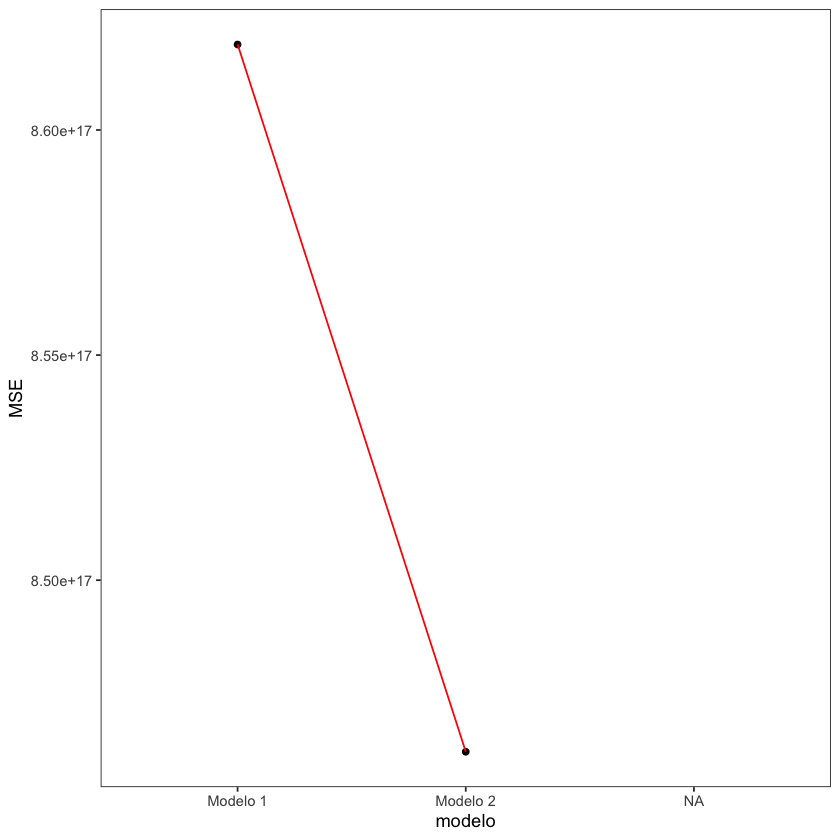

In [12]:

models$modelo[2] = "Modelo 2"
models$MSE[2] = mse2

ggplot(data=models , aes(x=modelo , y=MSE , group=1)) + 
geom_point() + geom_line(col="red") + theme_test()

In [13]:
colnames(house)

[1] "l4"            "rooms"         "bathrooms"     "surface_total"
 [5] "price"         "property_type" "dist_cbd"      "dist_cole"    
 [9] "dist_park"     "luces_2019"    "luces_2021"    "cambio_activ"

## 1.3 Que pasa si incluimos mas variables


### Modelo 3

In [14]:

## modelo 3
specification3 <- lm(price~rooms+bathrooms+surface_total,data=train) 

test$specification3<-predict(specification3,newdata = test) 

mse3 <- with(test,mean((price-specification3)^2,na.rm=T))
mse3

[1] 6.197152e+17

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


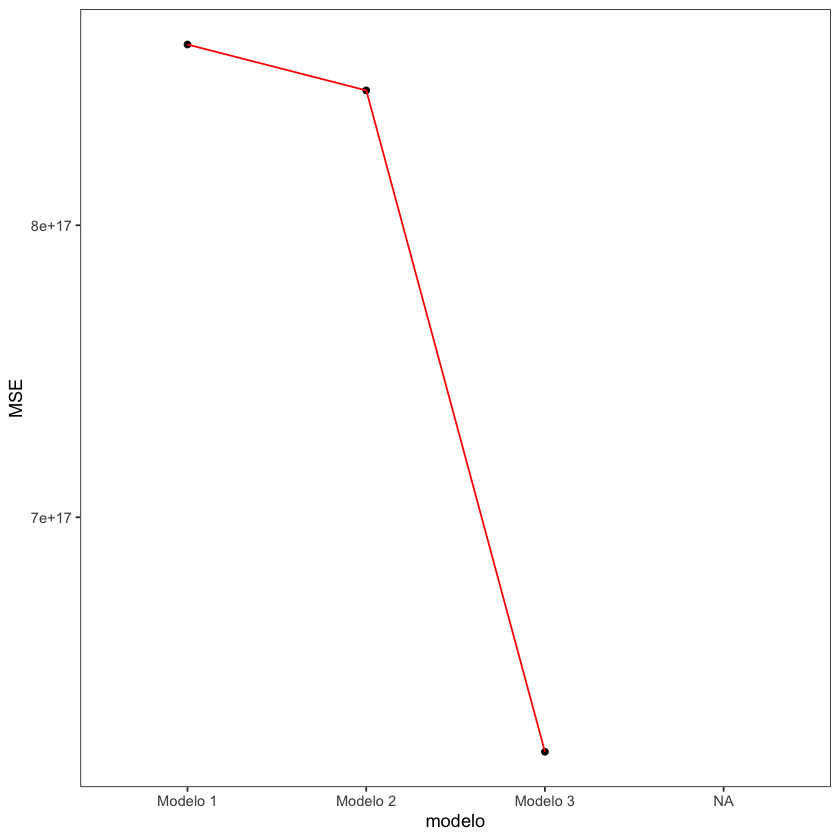

In [15]:

models$modelo[3] = "Modelo 3"
models$MSE[3] = mse3

ggplot(data=models , aes(x=modelo , y=MSE , group=1)) + 
geom_point() + geom_line(col="red") + theme_test()

### Modelo 4

In [16]:

specification4 <- lm(price~as.factor(l4)+rooms+bathrooms+surface_total+dist_cole+dist_park,data=train) 

test$specification4<-predict(specification4,newdata = test) 

mse4 <- with(test,mean((price-specification4)^2,na.rm=T))
mse4

[1] 5.932382e+17

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


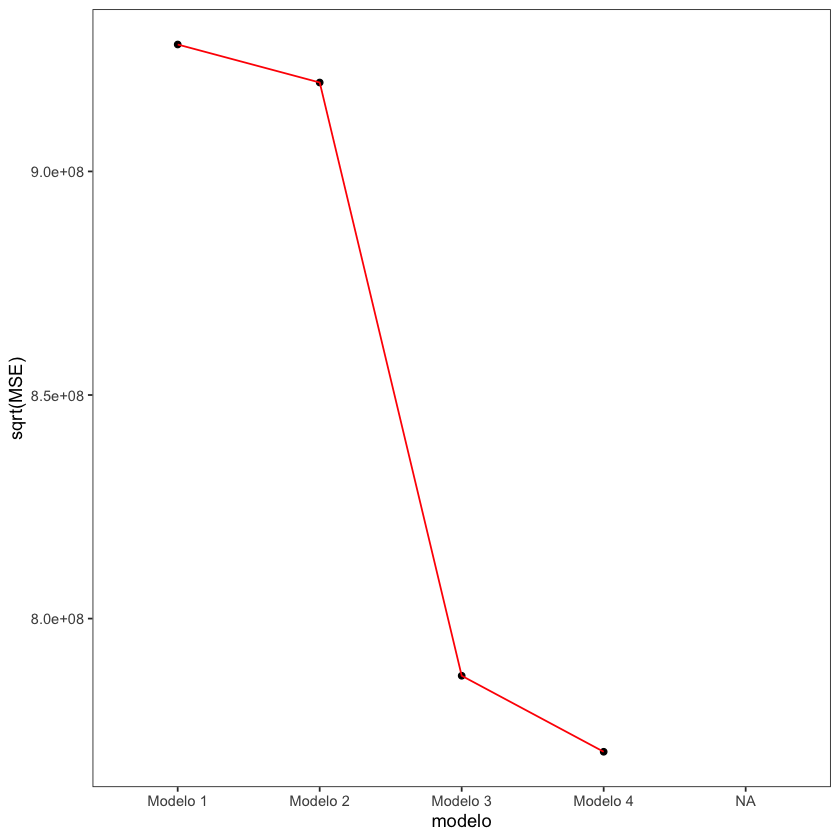

In [17]:

models$modelo[4] = "Modelo 4"
models$MSE[4] = mse4

ggplot(data=models , aes(x=modelo , y=sqrt(MSE) , group=1)) + 
geom_point() + geom_line(col="red") + theme_test()

###  ¿Hay un límite para esta mejora?

In [18]:
specification5 <- lm(price~ as.factor(l4) + poly(rooms,2):poly(surface_total,2):poly(bathrooms,2) + dist_cole:dist_park , data=train) 

summary(specification5)


Call:
lm(formula = price ~ as.factor(l4) + poly(rooms, 2):poly(surface_total, 
    2):poly(bathrooms, 2) + dist_cole:dist_park, data = train)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.667e+09 -3.542e+08 -1.502e+08  1.472e+08  9.041e+09 

Coefficients:
                                                              Estimate
(Intercept)                                                  3.846e+08
as.factor(l4)Barrios Unidos                                  1.869e+08
as.factor(l4)Bosa                                           -1.625e+08
as.factor(l4)Ciudad Bolívar                                  3.277e+06
as.factor(l4)Engativa                                       -1.012e+07
as.factor(l4)Los Mártires                                    1.712e+08
as.factor(l4)Puente Aranda                                   1.217e+06
as.factor(l4)Rafael Uribe Uribe                             -2.458e+07
as.factor(l4)Teusaquillo                                     3.008e+08
as.facto

[1] 7.344514e+17

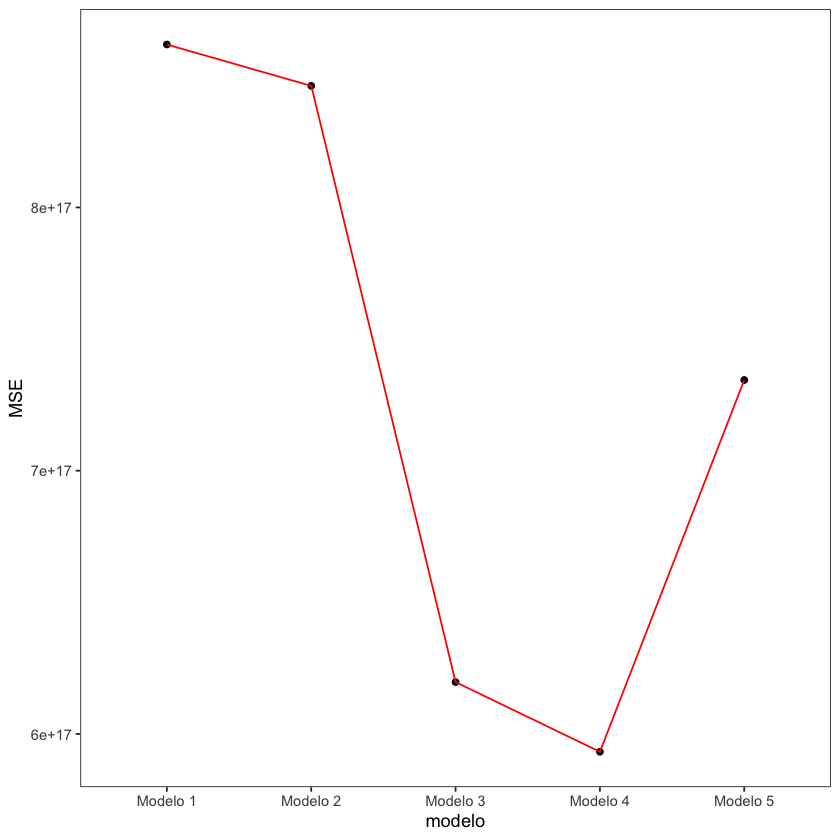

In [19]:
test$specification5<-predict(specification5,newdata = test) 

mse5 <- with(test,mean((price-specification5)^2,na.rm=T))
mse5

models$modelo[5] = "Modelo 5"
models$MSE[5] = mse5

ggplot(data=models , aes(x=modelo , y=MSE , group=1)) + 
geom_point() + geom_line(col="red") + theme_test()
